In [0]:
!pip install seaborn==0.9.0

In [1]:
import pandas as pd

In [4]:
#Importing the data from a link available: 

uri_films = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

films = pd.read_csv(uri_films)

films.columns = ['filme_id', 'title', 'genres']

films.head()

filme_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [5]:
#Getting the dummies

genres = films.genres.str.get_dummies()
film_data = pd.concat([films, genres], axis=1)
film_data.head()

filme_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  (no genres listed)  Action  \
0  Adventure|Animation|Children|Comedy|Fantasy                   0       0   
1                   Adventure|Children|Fantasy                   0       0   
2                               Comedy|Romance                   0       0   
3                         Comedy|Drama|Romance                   0       0   
4                                       Comedy                   0       0   

   Adventure  Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  \
0          1          1         1       1      0  ...          0       0   
1          1          0         1       0      0  ...          0       0   
2          0          0         0       1      0  ...          0       0   
3          0          0         0       1      0  ...          0       0   
4          0          0         0       1      0  ...          0       0   

   IMAX  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0     0        0        0        0       0         0    0        0  
1     0        0        0        0       0         0    0        0  
2     0        0        0        1       0         0    0        0  
3     0        0        0        1       0         0    0        0  
4     0        0        0        0       0         0    0        0  

[5 rows x 23 columns]

In [6]:
#Scaling the data:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_genres = scaler.fit_transform(genres)

scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [7]:
#Using a classification algorithm to group the genres - KMeans 
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters=3)

model.fit(scaled_genres)

print(f'Groups {model.labels_}')

Groups [1 1 2 ... 2 1 2]


In [9]:
#To understand how the algorithm separates the data, we will visualize the distance between
#centroids for each feature
print(genres.columns)
print(model.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.38784675 -0.24697458 -0.2181438  -0.26395167 -0.22506343
   2.58203502 -0.1977703   0.18022091 -0.24045863  0.66245806 -0.17053813
  -0.05707513 -0.15691184  0.34873204 -0.25233194 -0.25002756  0.72146118
  -0.15982454 -0.06265926]
 [-0.05917995 -0.01563085  0.88422441  2.27099694  2.42370249  0.20459445
  -0.33404597 -0.20267278 -0.58054081  0.87363051 -0.09492563 -0.26238441
   0.31006832  0.36961011 -0.11049248 -0.25696862  0.13952737 -0.44720115
  -0.16503077 -0.08465565]
 [ 0.01722226 -0.06073692 -0.07428609 -0.25813258 -0.27045122  0.00998183
  -0.37463158  0.05818758  0.04584913 -0.07397161 -0.09492563  0.0614964
  -0.03082797 -0.02236688 -0.04215103  0.0740315   0.02242837 -0.05895613
  

In [10]:
# To facilitate reading the data, we will transform the clusters in to a dataframe 
groups = pd.DataFrame(model.cluster_centers_,
            columns=genres.columns)

groups

(no genres listed)    Action  Adventure  Animation  Children    Comedy  \
0           -0.059180  0.387847  -0.246975  -0.218144 -0.263952 -0.225063   
1           -0.059180 -0.015631   0.884224   2.270997  2.423702  0.204594   
2            0.017222 -0.060737  -0.074286  -0.258133 -0.270451  0.009982   

      Crime  Documentary     Drama   Fantasy  Film-Noir    Horror      IMAX  \
0  2.582035    -0.197770  0.180221 -0.240459   0.662458 -0.170538 -0.057075   
1 -0.334046    -0.202673 -0.580541  0.873631  -0.094926 -0.262384  0.310068   
2 -0.374632     0.058188  0.045849 -0.073972  -0.094926  0.061496 -0.030828   

    Musical   Mystery   Romance    Sci-Fi  Thriller       War   Western  
0 -0.156912  0.348732 -0.252332 -0.250028  0.721461 -0.159825 -0.062659  
1  0.369610 -0.110492 -0.256969  0.139527 -0.447201 -0.165031 -0.084656  
2 -0.022367 -0.042151  0.074032  0.022428 -0.058956  0.047184  0.021077

In [11]:
groups.transpose()

0         1         2
(no genres listed) -0.059180 -0.059180  0.017222
Action              0.387847 -0.015631 -0.060737
Adventure          -0.246975  0.884224 -0.074286
Animation          -0.218144  2.270997 -0.258133
Children           -0.263952  2.423702 -0.270451
Comedy             -0.225063  0.204594  0.009982
Crime               2.582035 -0.334046 -0.374632
Documentary        -0.197770 -0.202673  0.058188
Drama               0.180221 -0.580541  0.045849
Fantasy            -0.240459  0.873631 -0.073972
Film-Noir           0.662458 -0.094926 -0.094926
Horror             -0.170538 -0.262384  0.061496
IMAX               -0.057075  0.310068 -0.030828
Musical            -0.156912  0.369610 -0.022367
Mystery             0.348732 -0.110492 -0.042151
Romance            -0.252332 -0.256969  0.074032
Sci-Fi             -0.250028  0.139527  0.022428
Thriller            0.721461 -0.447201 -0.058956
War                -0.159825 -0.165031  0.047184
Western            -0.062659 -0.084656  0.021077

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A909AB4340>,
      dtype=object)

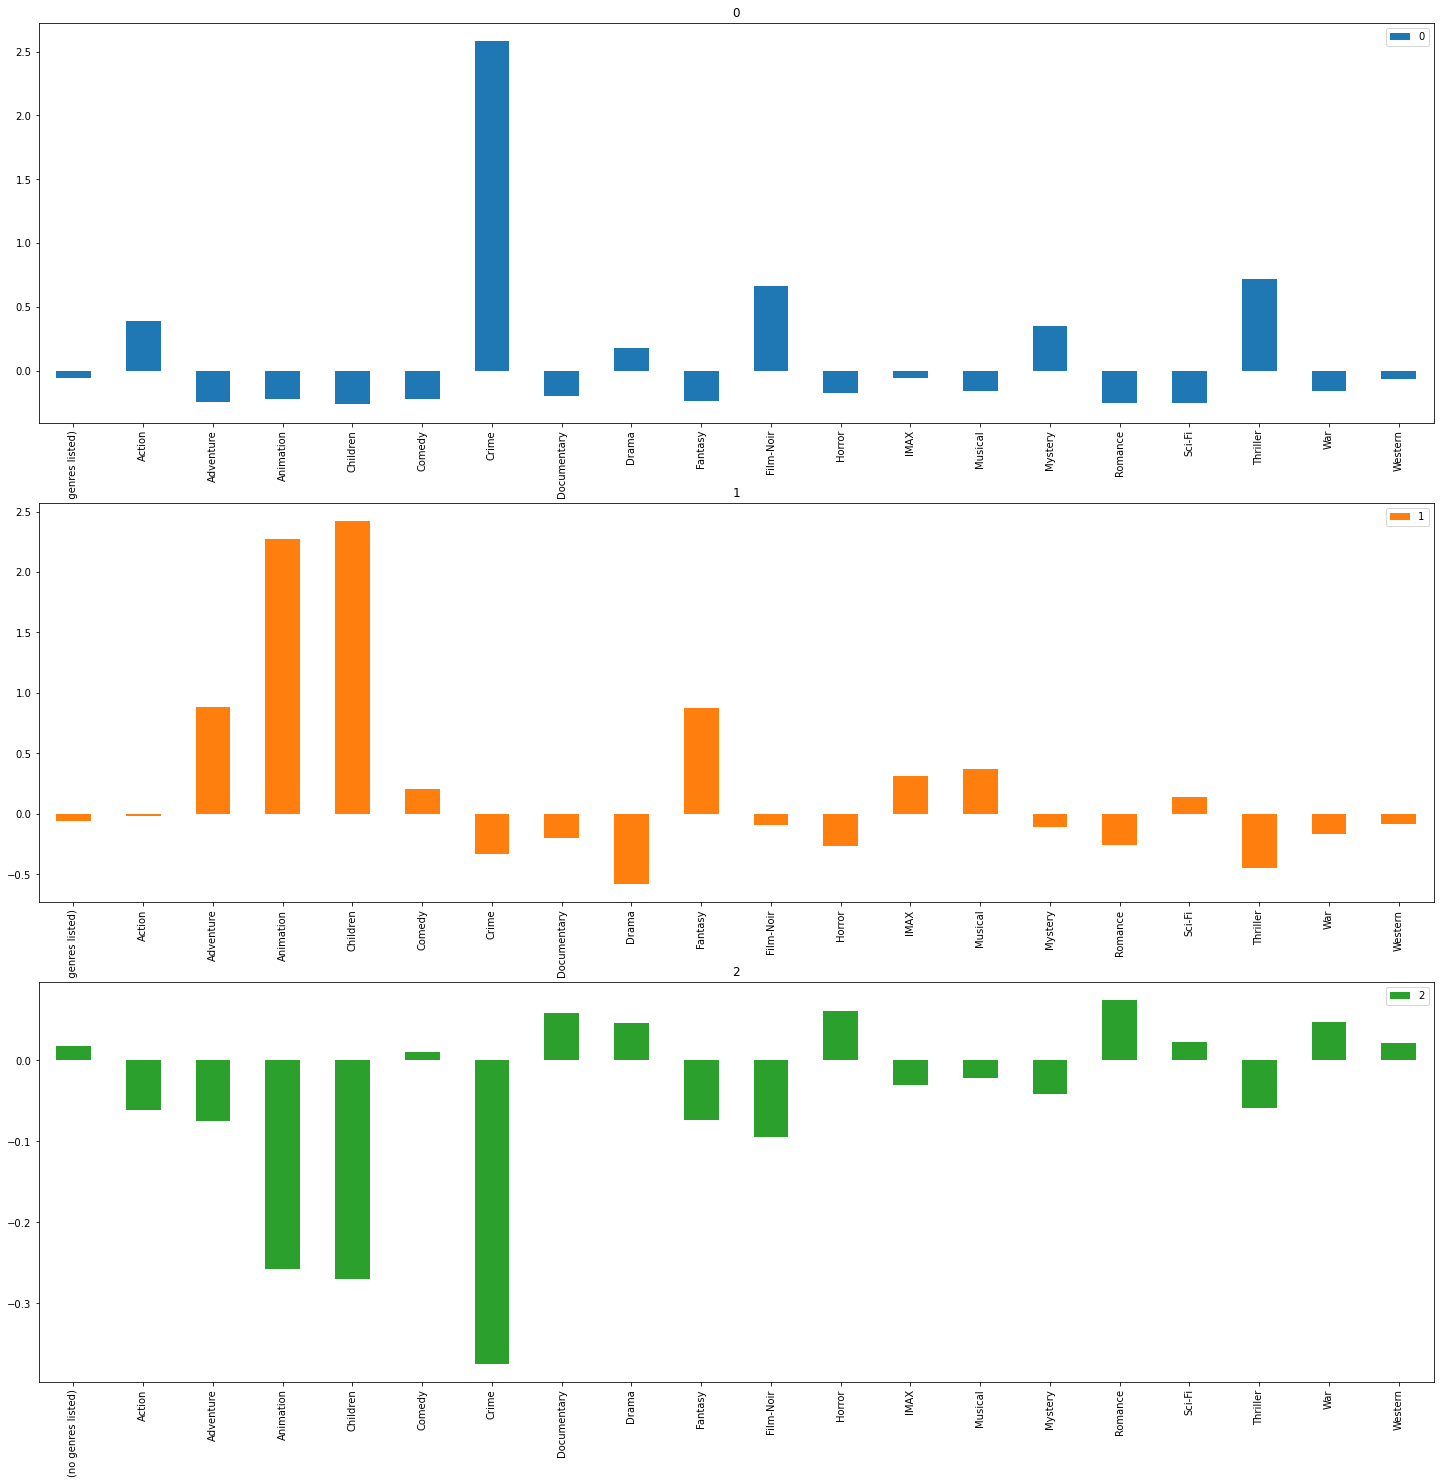

In [12]:
#Separating the groups into 3 subplots
groups.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [13]:
group = 0

filter = model.labels_ == group

film_data[filter].sample(10)

filme_id                                              title  \
6627     56156                                      Hitman (2007)   
7043     69122                               Hangover, The (2009)   
3733      5178                                         Fun (1994)   
5056      7924                        Stray Dog (Nora inu) (1949)   
8368    109295                        Cold Comes the Night (2013)   
1192      1589                                    Cop Land (1997)   
375        431                               Carlito's Way (1993)   
5926     33893  Perfect Crime, The (Crimen Ferpecto) (Ferpect ...   
1422      1945                           On the Waterfront (1954)   
6883     63062                                  Changeling (2008)   

                           genres  (no genres listed)  Action  Adventure  \
6627        Action|Crime|Thriller                   0       1          0   
7043                 Comedy|Crime                   0       0          0   
3733                  Crime|Drama                   0       0          0   
5056     Drama|Film-Noir|Thriller                   0       0          0   
8368         Crime|Drama|Thriller                   0       0          0   
1192  Action|Crime|Drama|Thriller                   0       1          0   
375                   Crime|Drama                   0       0          0   
5926        Comedy|Crime|Thriller                   0       0          0   
1422                  Crime|Drama                   0       0          0   
6883          Crime|Drama|Mystery                   0       0          0   

      Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  IMAX  \
6627          0         0       0      1  ...          0       0     0   
7043          0         0       1      1  ...          0       0     0   
3733          0         0       0      1  ...          0       0     0   
5056          0         0       0      0  ...          1       0     0   
8368          0         0       0      1  ...          0       0     0   
1192          0         0       0      1  ...          0       0     0   
375           0         0       0      1  ...          0       0     0   
5926          0         0       1      1  ...          0       0     0   
1422          0         0       0      1  ...          0       0     0   
6883          0         0       0      1  ...          0       0     0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
6627        0        0        0       0         1    0        0  
7043        0        0        0       0         0    0        0  
3733        0        0        0       0         0    0        0  
5056        0        0        0       0         1    0        0  
8368        0        0        0       0         1    0        0  
1192        0        0        0       0         1    0        0  
375         0        0        0       0         0    0        0  
5926        0        0        0       0         1    0        0  
1422        0        0        0       0         0    0        0  
6883        0        1        0       0         0    0        0  

[10 rows x 23 columns]

In [15]:
#Now we will reduce dimensionality of the model. For that we will import TSNE (t-distributed stochastic neighbor embedding). It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.


In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE()

visualization = tsne.fit_transform(scaled_genres)
visualization

array([[ 67.01031  ,   8.512565 ],
       [-74.33001  ,  19.55706  ],
       [ 24.785673 ,  35.794727 ],
       ...,
       [ 14.062987 , -22.949665 ],
       [-31.909063 ,  -1.1253444],
       [  2.19874  ,  11.312696 ]], dtype=float32)

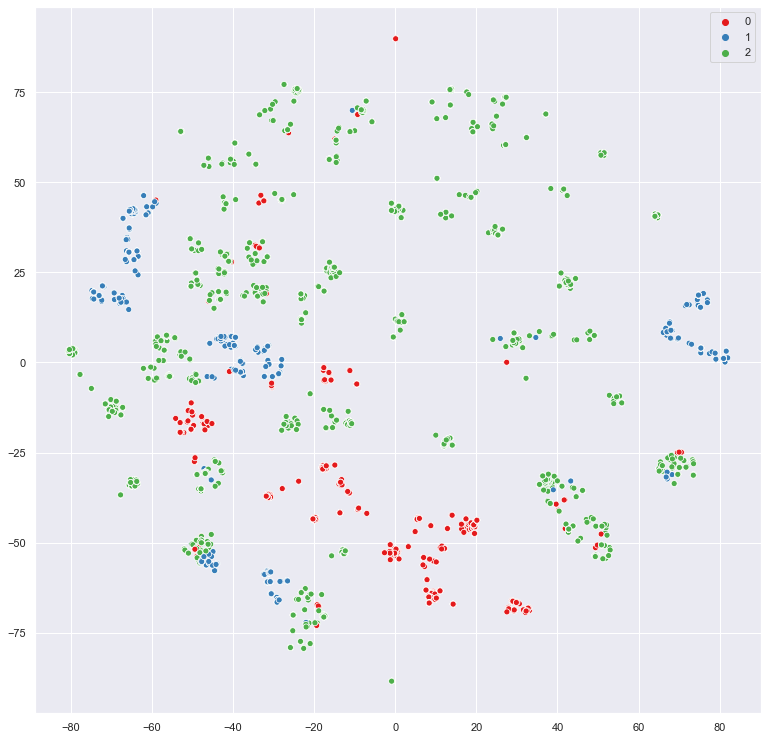

In [18]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualization[:, 0],
               y=visualization[:, 1],
               hue=model.labels_,
               palette=sns.color_palette('Set1', 3)) 

In [19]:
#Some of the points are in the same clusters. This can happen in any algorithm when we reduce dimensionality, because we may lose some of the information. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A90B993460>,
      dtype=object)

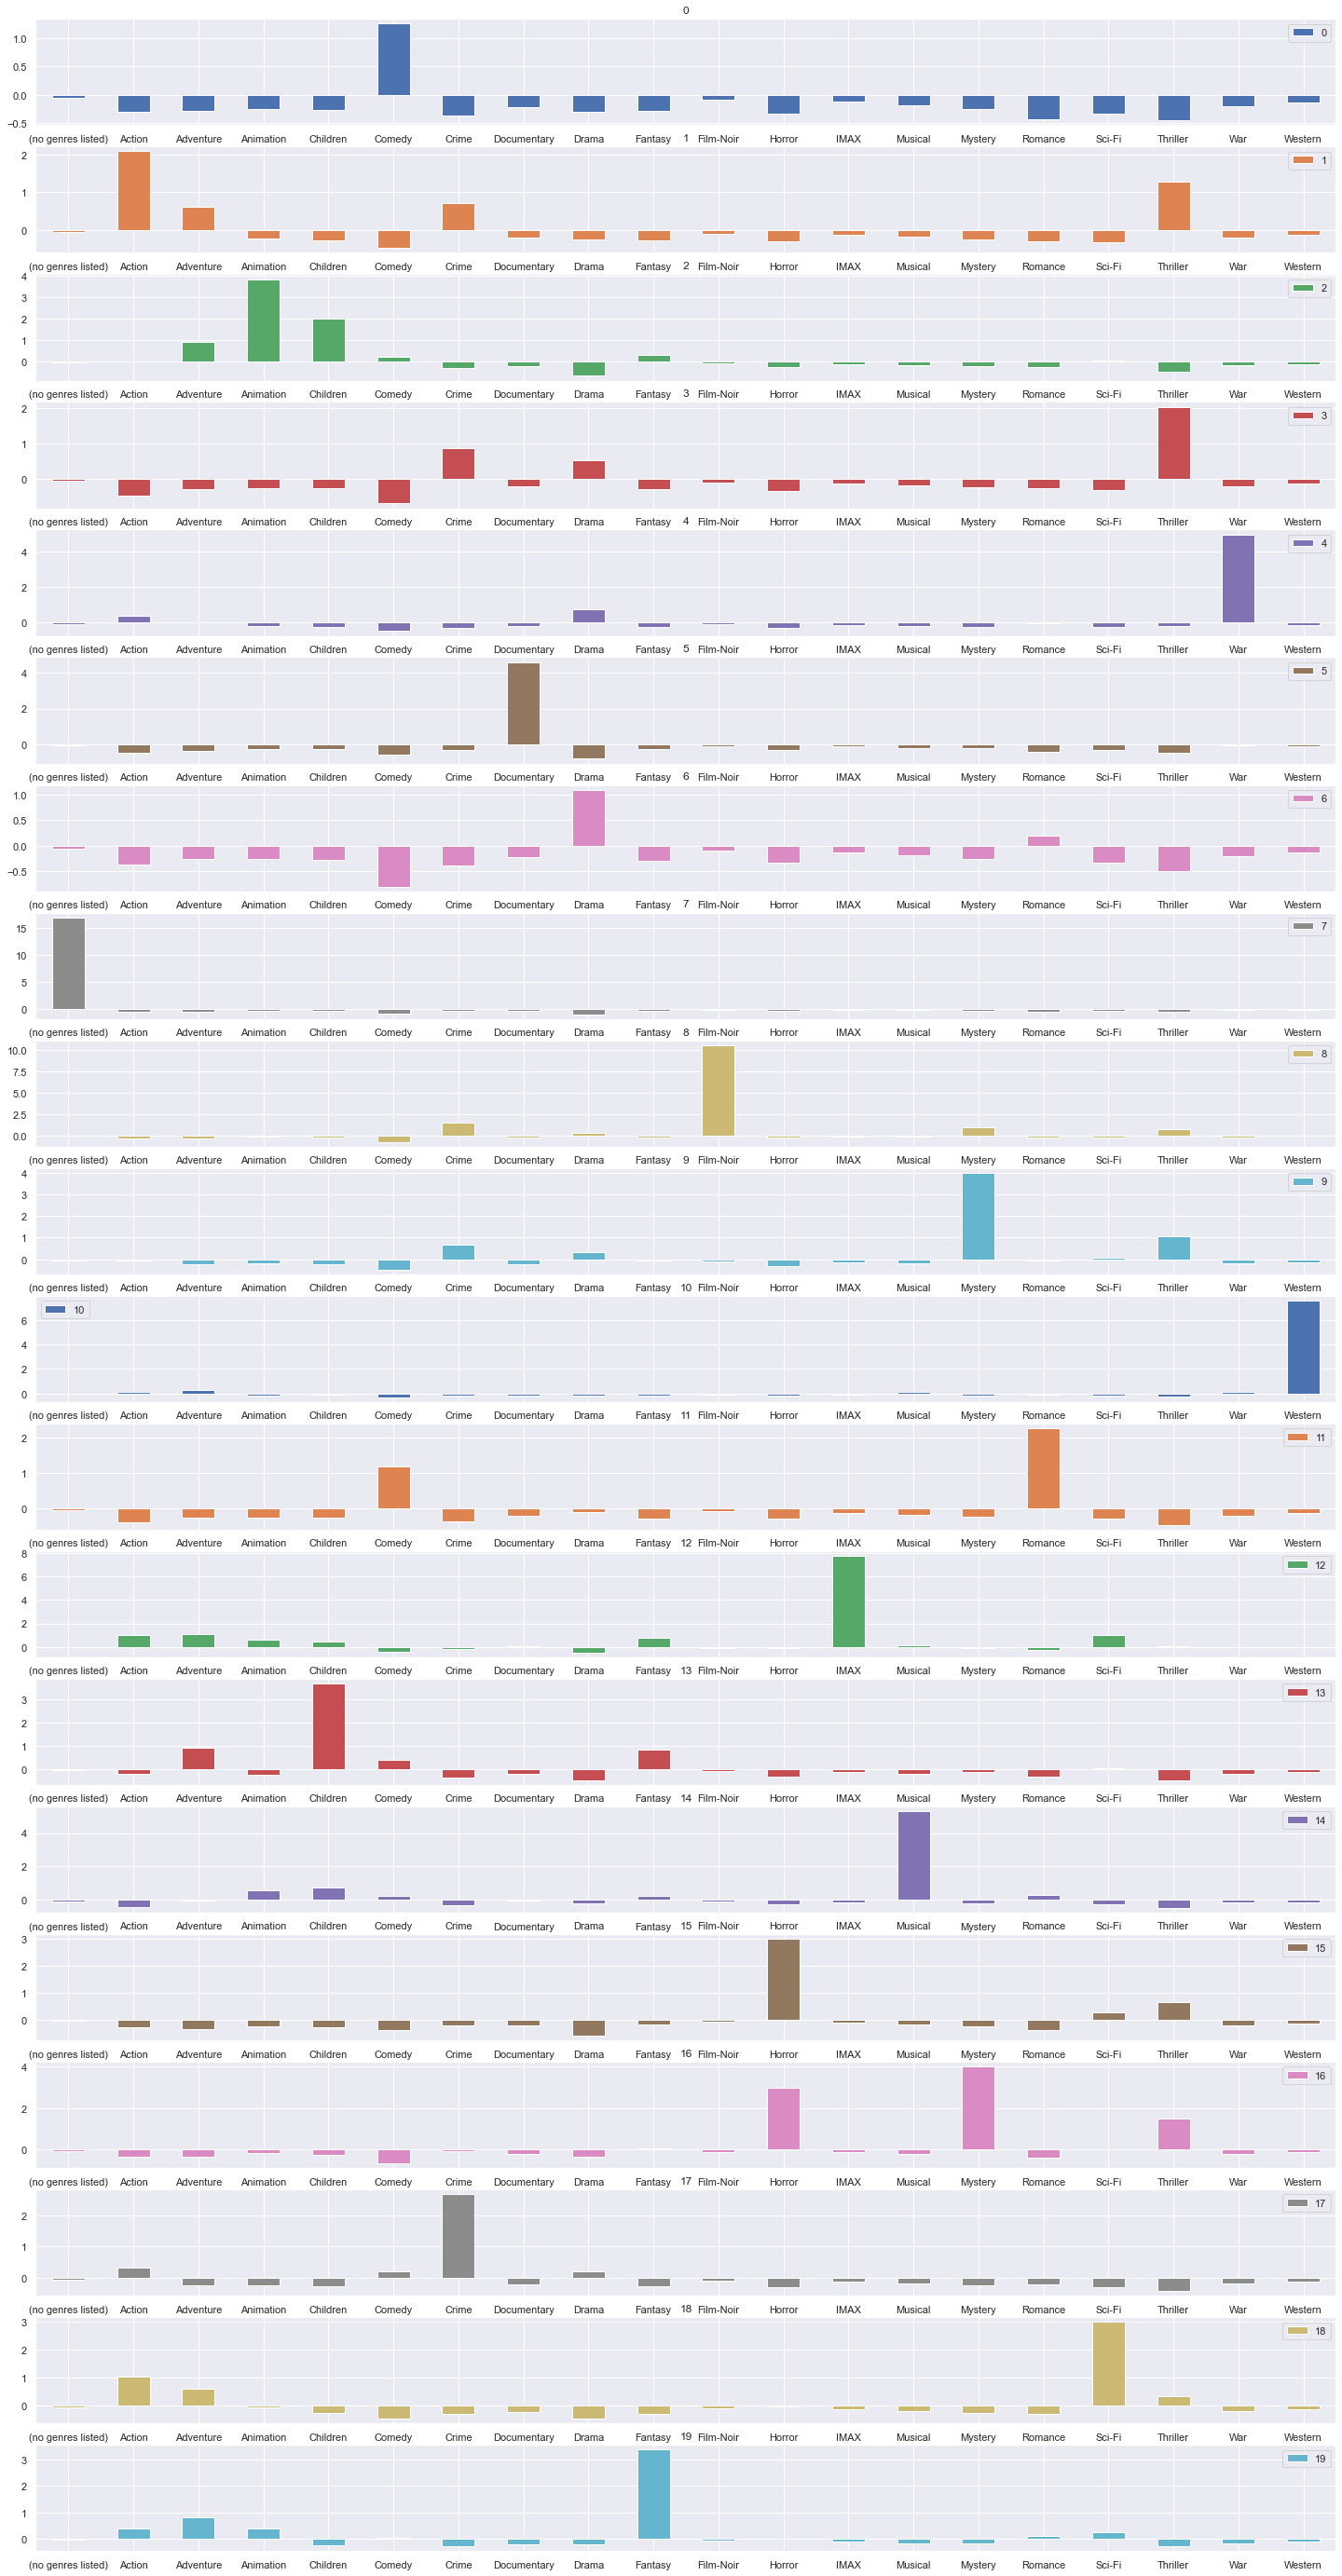

In [20]:
model = KMeans(n_clusters=20)

#Treining the model
model.fit(scaled_genres)
#Creating a dataframe with the results: 
groups = pd.DataFrame(model.cluster_centers_,
            columns=genres.columns)

groups.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [21]:
#Creating a filter to see what is being grouped
group = 16

filter = model.labels_ == group

film_data[filter].sample(10)

filme_id                                              title  \
324        366  Wes Craven's New Nightmare (Nightmare on Elm S...   
6637     56339               Orphanage, The (Orfanato, El) (2007)   
5632     27317                          Audition (Ôdishon) (1999)   
2508      3355                             Ninth Gate, The (1999)   
4045      5746                    Galaxy of Terror (Quest) (1981)   
4420      6530                 Tenant, The (Locataire, Le) (1976)   
5718     27839                               Ring Two, The (2005)   
5371      8957                                         Saw (2004)   
9112    145080                         Extraordinary Tales (2015)   
21          22                                     Copycat (1995)   

                                     genres  (no genres listed)  Action  \
324           Drama|Horror|Mystery|Thriller                   0       0   
6637          Drama|Horror|Mystery|Thriller                   0       0   
5632  Drama|Horror|Mystery|Romance|Thriller                   0       0   
2508        Fantasy|Horror|Mystery|Thriller                   0       0   
4045           Action|Horror|Mystery|Sci-Fi                   0       1   
4420          Drama|Horror|Mystery|Thriller                   0       0   
5718          Drama|Horror|Mystery|Thriller                   0       0   
5371                Horror|Mystery|Thriller                   0       0   
9112               Animation|Horror|Mystery                   0       0   
21      Crime|Drama|Horror|Mystery|Thriller                   0       0   

      Adventure  Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  \
324           0          0         0       0      0  ...          0       1   
6637          0          0         0       0      0  ...          0       1   
5632          0          0         0       0      0  ...          0       1   
2508          0          0         0       0      0  ...          0       1   
4045          0          0         0       0      0  ...          0       1   
4420          0          0         0       0      0  ...          0       1   
5718          0          0         0       0      0  ...          0       1   
5371          0          0         0       0      0  ...          0       1   
9112          0          1         0       0      0  ...          0       1   
21            0          0         0       0      1  ...          0       1   

      IMAX  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
324      0        0        1        0       0         1    0        0  
6637     0        0        1        0       0         1    0        0  
5632     0        0        1        1       0         1    0        0  
2508     0        0        1        0       0         1    0        0  
4045     0        0        1        0       1         0    0        0  
4420     0        0        1        0       0         1    0        0  
5718     0        0        1        0       0         1    0        0  
5371     0        0        1        0       0         1    0        0  
9112     0        0        1        0       0         0    0        0  
21       0        0        1        0       0         1    0        0  

[10 rows x 23 columns]

In [22]:
#Now how many groups should we choose? We will create a function to optimize this study:

In [23]:
def kmeans(number_of_clusters, genres):
  model = KMeans(n_clusters=number_of_clusters)
  model.fit(genres)
  return [number_of_clusters, model.inertia_]

In [24]:
#As an example, with 20 clusters, let's see the squared mean error:
kmeans(20, scaled_genres)

[20, 55152.83991988762]

In [25]:
#Now, with 3 clusters: 
kmeans(3, scaled_genres)

[3, 166516.6453720236]

In [26]:
#Executing the function for a number of clusters between 1 and 40:
results = [kmeans(number_of_clusters, scaled_genres) for number_of_clusters in range(1, 41)]
results

[[1, 194839.9999999991],
 [2, 179483.94029403722],
 [3, 166516.8100457521],
 [4, 156320.3760622918],
 [5, 145891.6767185438],
 [6, 137990.0120095157],
 [7, 127790.68605106576],
 [8, 119969.93451472903],
 [9, 112448.33031538292],
 [10, 102607.75260565648],
 [11, 92800.986544189],
 [12, 87290.23119664256],
 [13, 81675.76520905117],
 [14, 74184.4172654583],
 [15, 69814.5023354241],
 [16, 64478.11635436235],
 [17, 63182.37708972635],
 [18, 58252.6347220661],
 [19, 57672.262186179694],
 [20, 54610.015708825915],
 [21, 53069.60595476166],
 [22, 51488.93444491091],
 [23, 50229.1367669366],
 [24, 48922.36864784977],
 [25, 48523.719473174846],
 [26, 47473.61161230149],
 [27, 46274.297228338466],
 [28, 44892.19985094468],
 [29, 43203.37496404024],
 [30, 42563.393127711286],
 [31, 42235.470185024205],
 [32, 40657.19072921],
 [33, 40097.66447451683],
 [34, 39425.92711745349],
 [35, 39112.219613440204],
 [36, 38023.5962348677],
 [37, 37731.69595760165],
 [38, 36459.53759934961],
 [39, 35945.0602161

In [28]:
#Transforming it into a dataframe for better visualization 
results = pd.DataFrame(results, 
            columns=['groups', 'inertia'])
results

groups        inertia
0        1  194840.000000
1        2  179483.940294
2        3  166516.810046
3        4  156320.376062
4        5  145891.676719
5        6  137990.012010
6        7  127790.686051
7        8  119969.934515
8        9  112448.330315
9       10  102607.752606
10      11   92800.986544
11      12   87290.231197
12      13   81675.765209
13      14   74184.417265
14      15   69814.502335
15      16   64478.116354
16      17   63182.377090
17      18   58252.634722
18      19   57672.262186
19      20   54610.015709
20      21   53069.605955
21      22   51488.934445
22      23   50229.136767
23      24   48922.368648
24      25   48523.719473
25      26   47473.611612
26      27   46274.297228
27      28   44892.199851
28      29   43203.374964
29      30   42563.393128
30      31   42235.470185
31      32   40657.190729
32      33   40097.664475
33      34   39425.927117
34      35   39112.219613
35      36   38023.596235
36      37   37731.695958
37      38   36459.537599
38      39   35945.060216
39      40   35684.613635

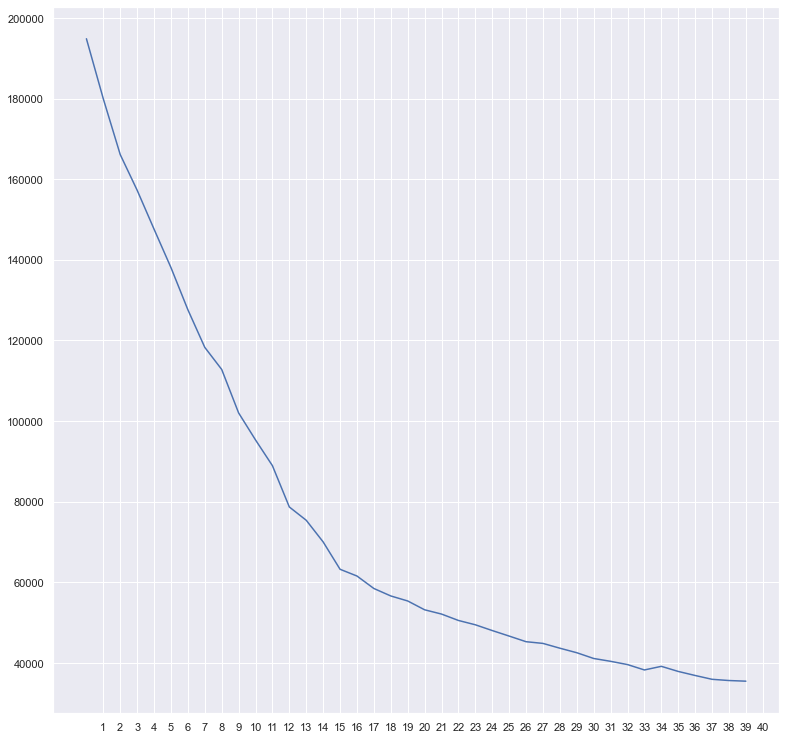

In [25]:
#Para aparecer todos os grupos de 1 a 40 no eixo x é necessário informar de onde vai tirar esse dado com xticks
resultado.inertia.plot(xticks=resultado.grupos)

In [26]:
#Using the elbow method, the number of clusters to choose would be 17, because it is aroud 17 in the x axis that the graph forms a curve simular to an elbow. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A909D45880>,
      dtype=object)

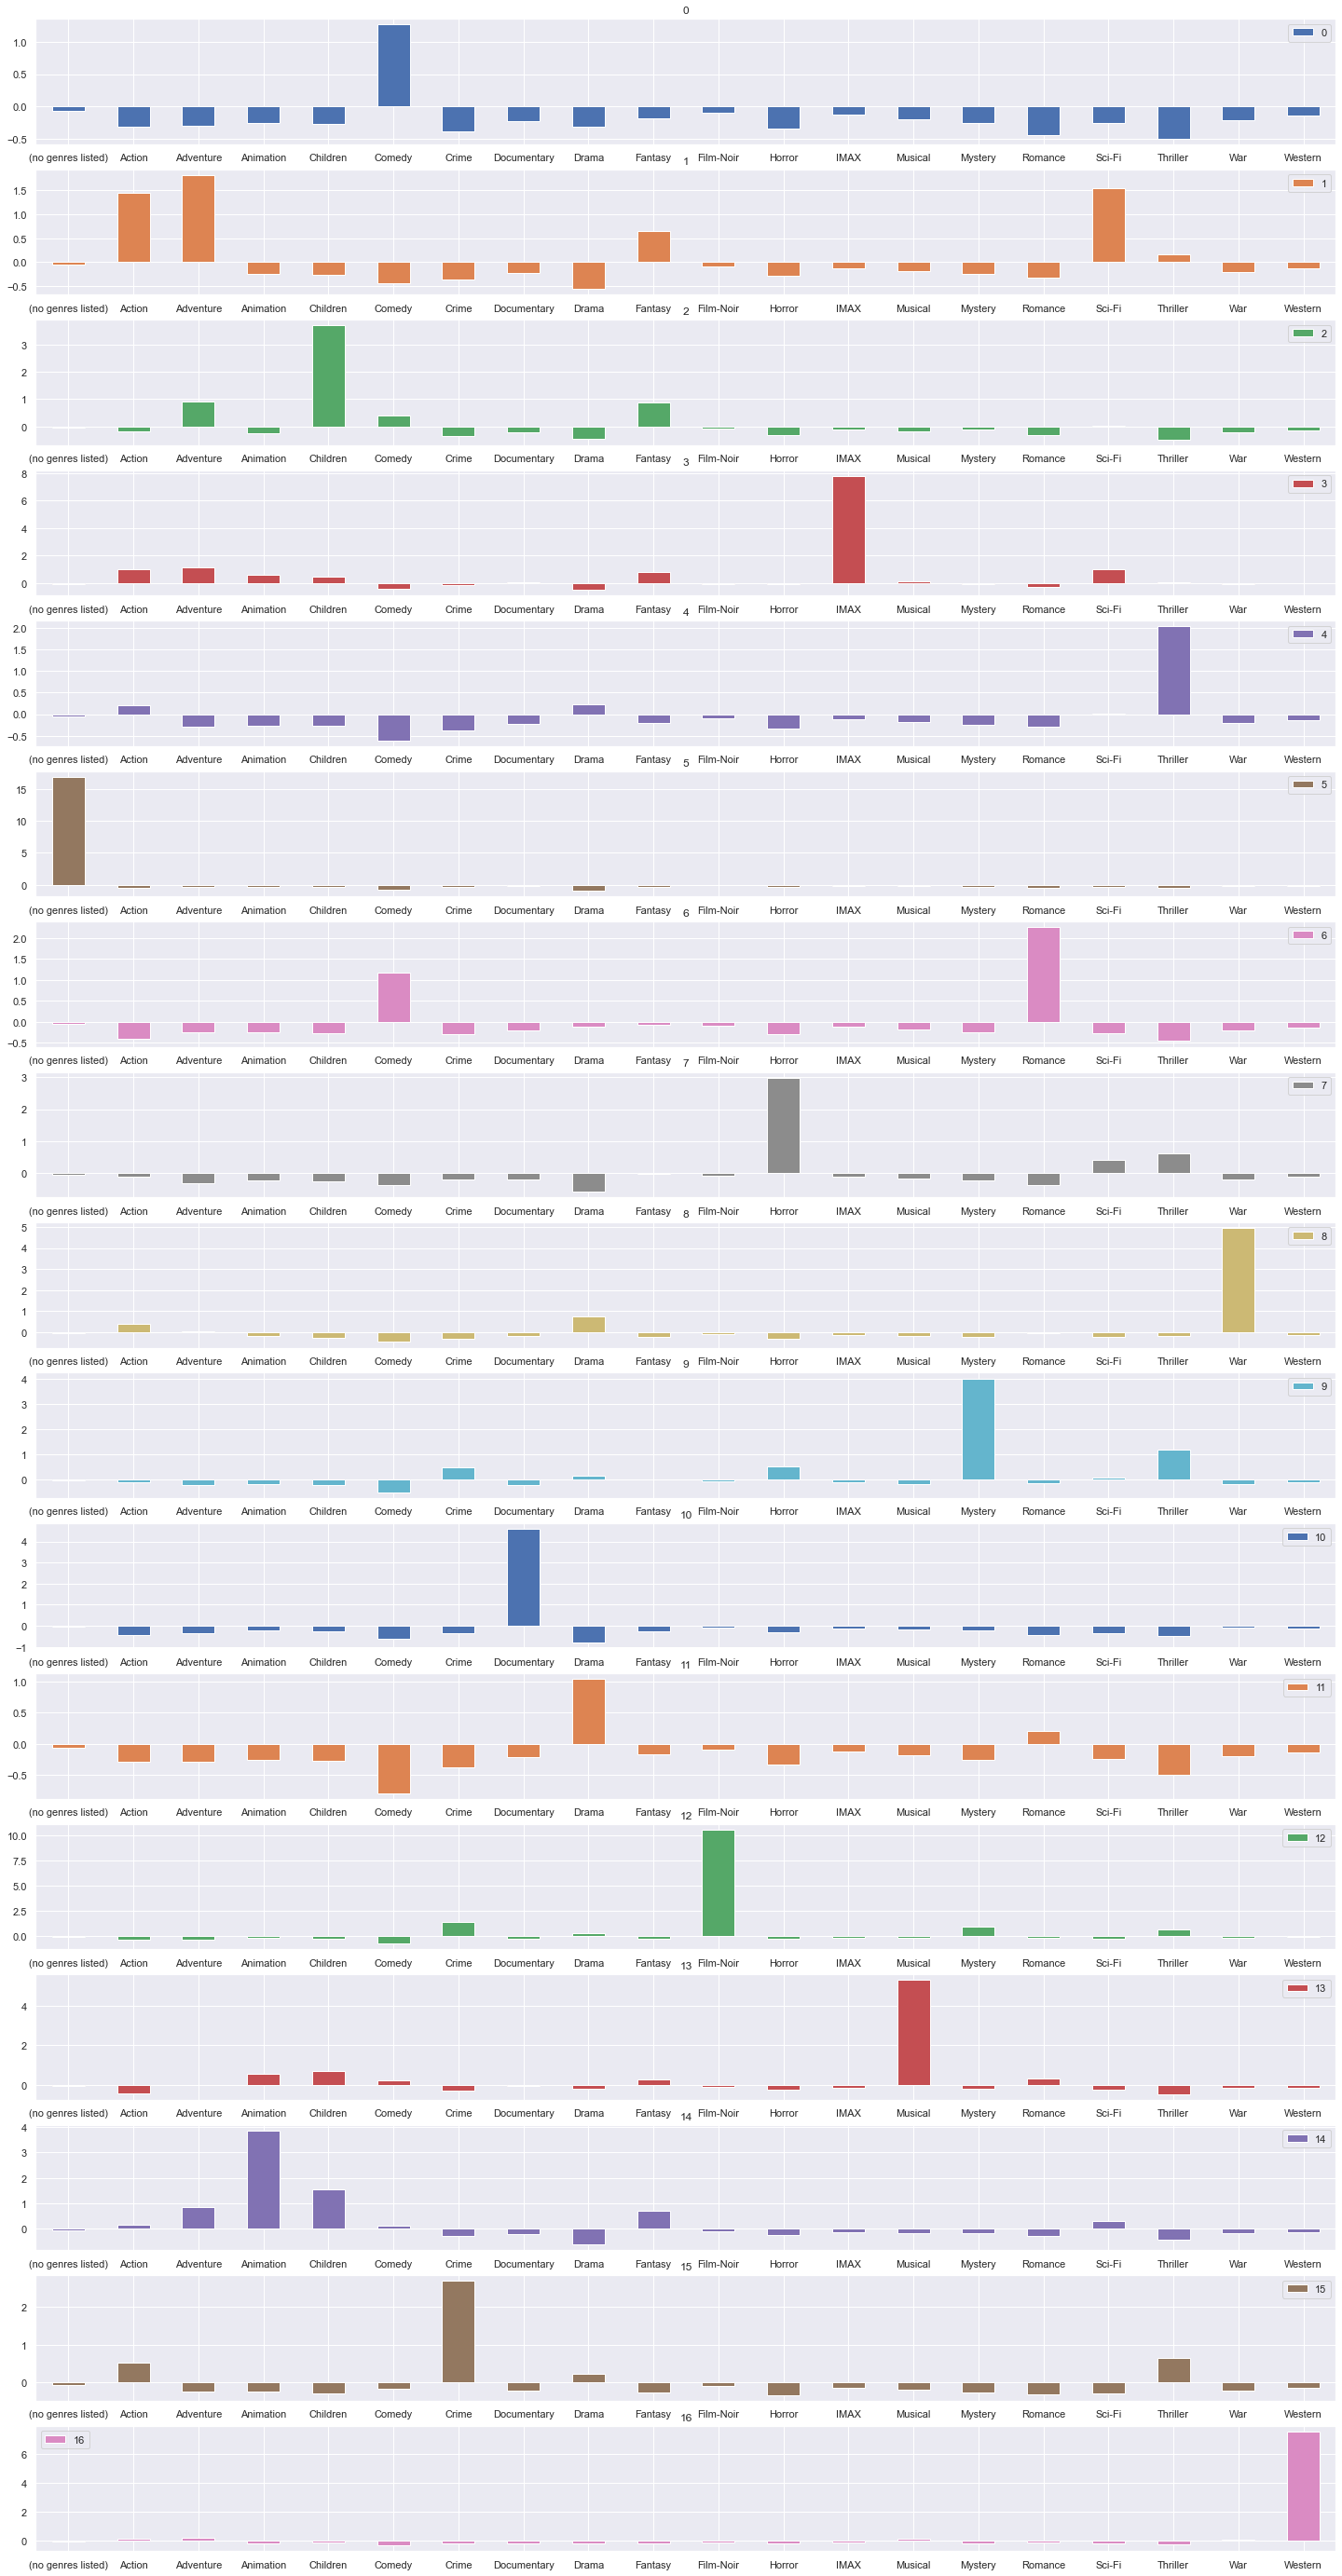

In [29]:

model = KMeans(n_clusters=17)
model.fit(scaled_genres)

groups = pd.DataFrame(model.cluster_centers_,
            columns=genres.columns)

groups.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [30]:
#Visualizing with a filter:
group = 16

filer = model.labels_ == group

film_data[filter].sample(10)

filme_id                                            title  \
2508      3355                           Ninth Gate, The (1999)   
5089      8019  Dark Water (Honogurai mizu no soko kara) (2002)   
5363      8947                               Grudge, The (2004)   
5821     32060                   Cat and the Canary, The (1927)   
5371      8957                                       Saw (2004)   
5663     27604            Suicide Club (Jisatsu saakuru) (2001)   
2460      3273                                  Scream 3 (2000)   
4664      6967                             Dead of Night (1945)   
6434     51666                            Abandoned, The (2006)   
5750     30894                               White Noise (2005)   

                                    genres  (no genres listed)  Action  \
2508       Fantasy|Horror|Mystery|Thriller                   0       0   
5089         Drama|Horror|Mystery|Thriller                   0       0   
5363               Horror|Mystery|Thriller                   0       0   
5821                        Horror|Mystery                   0       0   
5371               Horror|Mystery|Thriller                   0       0   
5663               Horror|Mystery|Thriller                   0       0   
2460        Comedy|Horror|Mystery|Thriller                   0       0   
4664                        Horror|Mystery                   0       0   
6434               Horror|Mystery|Thriller                   0       0   
5750  Drama|Horror|Mystery|Sci-Fi|Thriller                   0       0   

      Adventure  Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  \
2508          0          0         0       0      0  ...          0       1   
5089          0          0         0       0      0  ...          0       1   
5363          0          0         0       0      0  ...          0       1   
5821          0          0         0       0      0  ...          0       1   
5371          0          0         0       0      0  ...          0       1   
5663          0          0         0       0      0  ...          0       1   
2460          0          0         0       1      0  ...          0       1   
4664          0          0         0       0      0  ...          0       1   
6434          0          0         0       0      0  ...          0       1   
5750          0          0         0       0      0  ...          0       1   

      IMAX  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
2508     0        0        1        0       0         1    0        0  
5089     0        0        1        0       0         1    0        0  
5363     0        0        1        0       0         1    0        0  
5821     0        0        1        0       0         0    0        0  
5371     0        0        1        0       0         1    0        0  
5663     0        0        1        0       0         1    0        0  
2460     0        0        1        0       0         1    0        0  
4664     0        0        1        0       0         0    0        0  
6434     0        0        1        0       0         1    0        0  
5750     0        0        1        0       1         1    0        0  

[10 rows x 23 columns]

In [31]:
#Now grouping the clusters using Agglomerative Clustering, it recursively merges the pair of clusters that minimally increases a given linkage distance.
from sklearn.cluster import AgglomerativeClustering

In [32]:
model = AgglomerativeClustering(n_clusters=17)
groups = model.fit_predict(scaled_genres)
groups

array([ 5, 14, 13, ...,  2,  5,  3], dtype=int64)

In [36]:
#Creating a dispersion graph using this data
tsne = TSNE()
visualization = tsne.fit_transform(scaled_genres)
visualization

array([[-37.11631  , -44.39139  ],
       [ 63.407185 ,  -3.9803927],
       [  5.102722 ,  21.814013 ],
       ...,
       [-17.324041 ,   3.1154473],
       [-34.471478 ,  44.473145 ],
       [ 22.545338 ,  -2.872983 ]], dtype=float32)

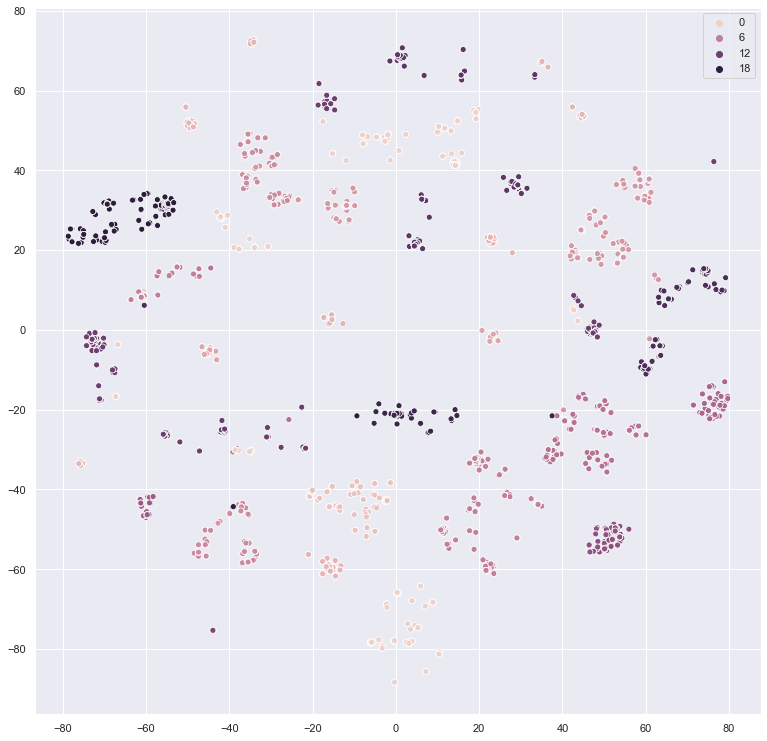

In [37]:
sns.scatterplot(x=visualization[:, 0],
               y=visualization[:, 1],
               hue=groups)

In [38]:
#Importing the hiearachical grouping 
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A90ED70640>,
      dtype=object)

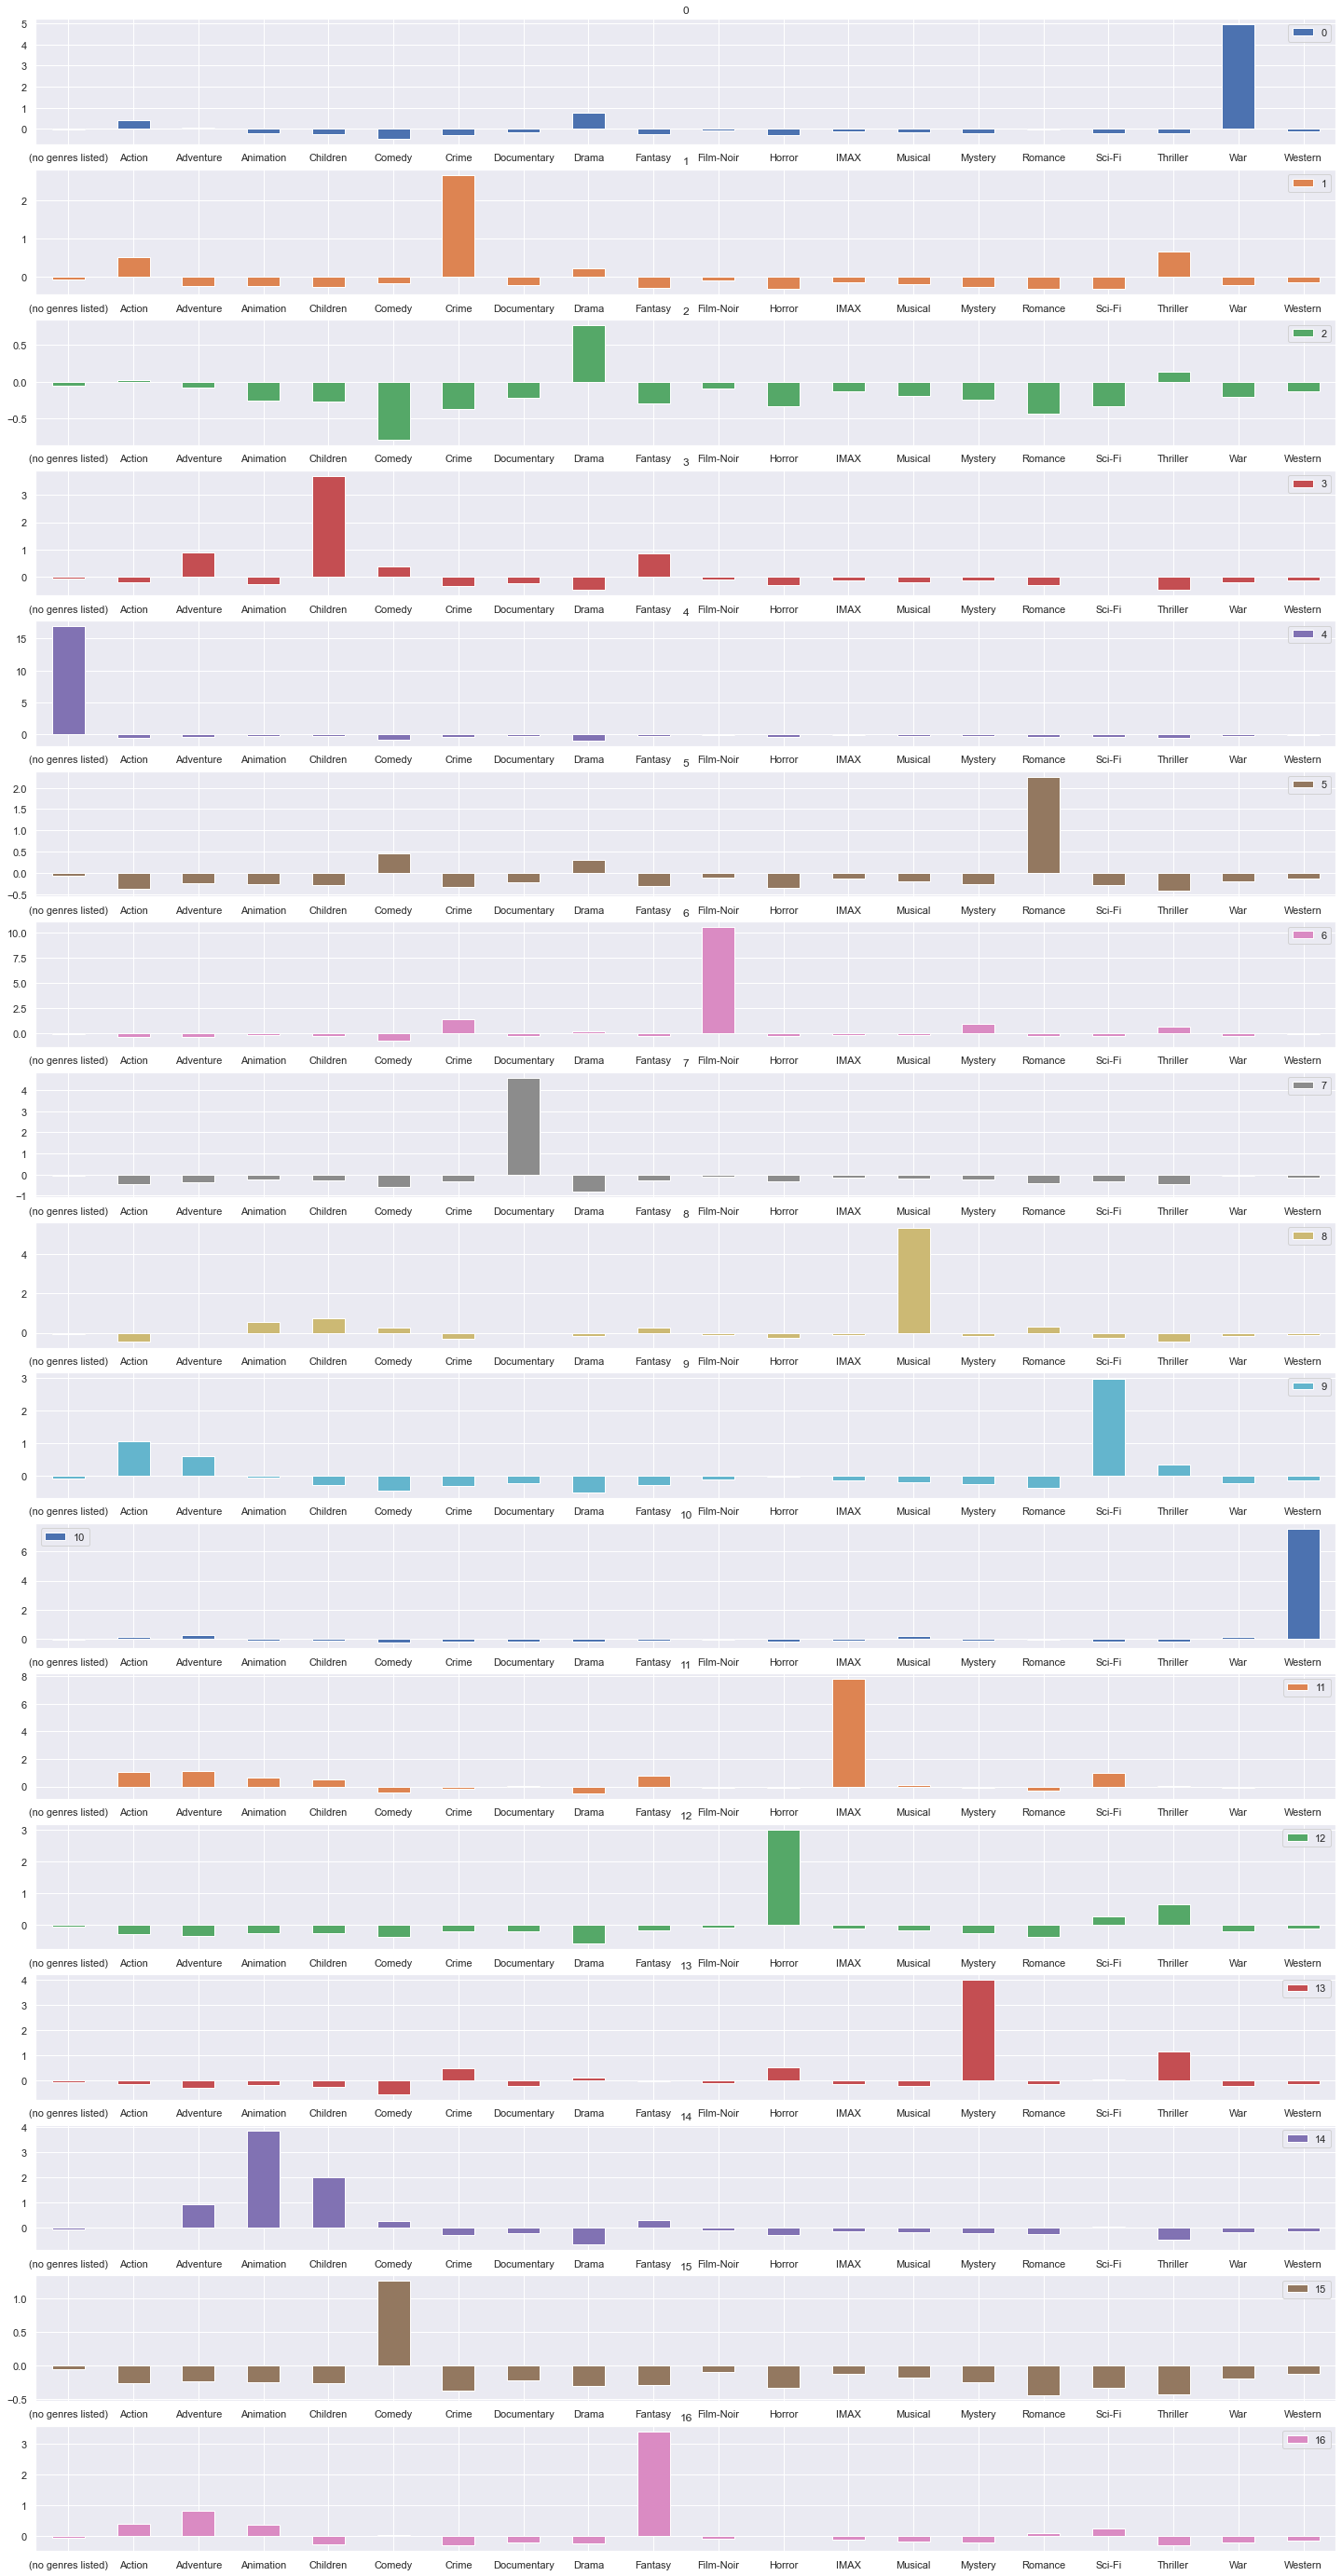

In [39]:
#Executing the code again to visualize the graphs before applying dendogram
model = KMeans(n_clusters=17)
model.fit(scaled_genres)

groups = pd.DataFrame(model.cluster_centers_,
            columns=genres.columns)

groups.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [40]:
#Visualizing the distances matrix
distance_matrix = linkage(groups)
distance_matrix

array([[ 2.        , 15.        ,  2.40687238,  2.        ],
       [ 5.        , 17.        ,  2.88506214,  3.        ],
       [ 1.        , 18.        ,  3.24644492,  4.        ],
       [12.        , 19.        ,  3.73289442,  5.        ],
       [ 9.        , 20.        ,  3.81892459,  6.        ],
       [16.        , 21.        ,  4.18876518,  7.        ],
       [ 3.        , 22.        ,  4.39832507,  8.        ],
       [14.        , 23.        ,  4.51199492,  9.        ],
       [13.        , 24.        ,  4.63380485, 10.        ],
       [ 7.        , 25.        ,  5.13954754, 11.        ],
       [ 0.        , 26.        ,  5.20458155, 12.        ],
       [ 8.        , 27.        ,  5.82665498, 13.        ],
       [10.        , 28.        ,  7.82385085, 14.        ],
       [11.        , 29.        ,  8.33500593, 15.        ],
       [ 6.        , 30.        , 10.81587978, 16.        ],
       [ 4.        , 31.        , 17.06046366, 17.        ]])

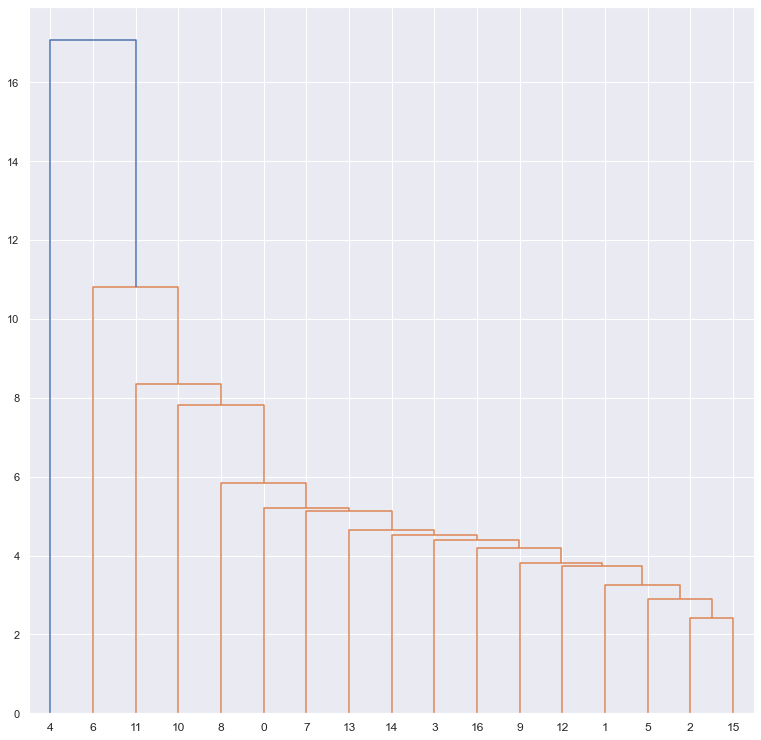

In [41]:
#Plotting the dendogram
ddgram = dendrogram(distance_matrix)